# The CRISP-DM Process (Cross Industry Process for Data Mining)
## I. Business Understanding
1. Which target audiences that producers are focused on?
2. Which genres have the most movies and their combination?
3. How many drama movie released every year? And does their quality increase overtime?


## II. Data Understanding
### Gathering Data
Netflix - TV Shows and Movies
This data set was created to list all shows available on Netflix streaming. This data was acquired in May 2022 containing data available in the United States. Dataset has been collected and normalize some columns can be directly download from [Netflix - TV Shows and Movies](https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies). 

In [223]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

In [224]:
# Read the titles.csv file, each row is a movies (shows), each columns its detail with unique values or categorial values
df = pd.read_csv('./titles.csv')

In [225]:
# Read the credits.csv file, each row is a person who join the movie (show), each columns is their information
df_credits = pd.read_csv('./credits.csv')

### Assessing Data

In [226]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [228]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


In [229]:
rows = df.shape[0]
cols = df.shape[1]
print(f'Titles: {rows} rows - {cols} columns')

Titles: 5806 rows - 15 columns


In [230]:
list(set(df.columns[df.isna().mean() > 0.25]))

['seasons', 'age_certification']

### Summary: 
- To answer our question, we only need titles.csv
- Movies dataset has 5806 rows and 15 columns, that's is quite big
- Some columns have NaN value, especially on imdb_score, age_certification, and seasons. For seasons due to the type of movies/shows which has NaN
- genres contain multiple categorical values in one cell

## III. Data Preparation

### Data Cleaning

In [231]:
# See how many rows has NaN in IMDB Score
df['imdb_score'].isnull().sum()

523

In [232]:
# Some movies has IMDB ID but has not open to vote yet
df.loc[df['imdb_score'].isnull(), 'imdb_score'] = 0.0

In [233]:
# Extract all possible genres value
genres_values = df['genres'].value_counts()
list_genres_values = []
for val in genres_values.index.values.tolist():
    # Due to string in numpy, we have to split value by ',' also remove empty space on our object
    tmp = [t.replace('\'', '').strip() for t in val[1:-1].split(',')]
    list_genres_values += tmp
# Convert to set to remove duplicate and empty string
list_genres_values = list(filter(None, list(set(list_genres_values))))
list_genres_values

['romance',
 'animation',
 'documentation',
 'comedy',
 'sport',
 'horror',
 'european',
 'drama',
 'history',
 'scifi',
 'fantasy',
 'thriller',
 'war',
 'family',
 'crime',
 'reality',
 'action',
 'music',
 'western']

In [234]:
# Count ratio between NaN values and total rows
nan_ratio = (df['age_certification'].isnull().sum() / df.shape[0]) * 100
nan_ratio

44.95349638305201

In [235]:
# Assume all blank movie can be viewed by all age
df.loc[df['age_certification'].isnull(), 'age_certification'] = 'G'
df['age_certification'].value_counts()

G        2741
TV-MA     841
R         575
TV-14     470
PG-13     440
PG        246
TV-PG     186
TV-Y7     112
TV-Y      105
TV-G       76
NC-17      14
Name: age_certification, dtype: int64

## III. Modeling
### Analyse & Visualization

### Question 1: Which target audiences that producers are focused on?
Age Certification is a move rating system created for classifying the audience it is targeting, Netflix uses this system to notify viewers about what they are going to view and make decisions before continue. More info about Age Certification: [Movie Ratings](https://gopioneer.com/wp-content/uploads/2017/01/dtv_movieratings.pdf)

In [242]:
df['age_certification'].value_counts()

G        2741
TV-MA     841
R         575
TV-14     470
PG-13     440
PG        246
TV-PG     186
TV-Y7     112
TV-Y      105
TV-G       76
NC-17      14
Name: age_certification, dtype: int64

More than 2741 G ratings on Netflix, aim at everyone and contain nothing be offensive to parents and children. But during data cleaning phase, G ratings was used to fill to NaN value of most movies, so this may not accurate. Most producers seem to target teenagers and adults from TV-MA, R, and TV-14.

### Question 2: Which genres have the most movies and their combination?
The viewer might choose movies/shows based on their short description, trailer, category, and in this case, genres. By finding which genres are popular, Netflix can produce more movies in these categories.

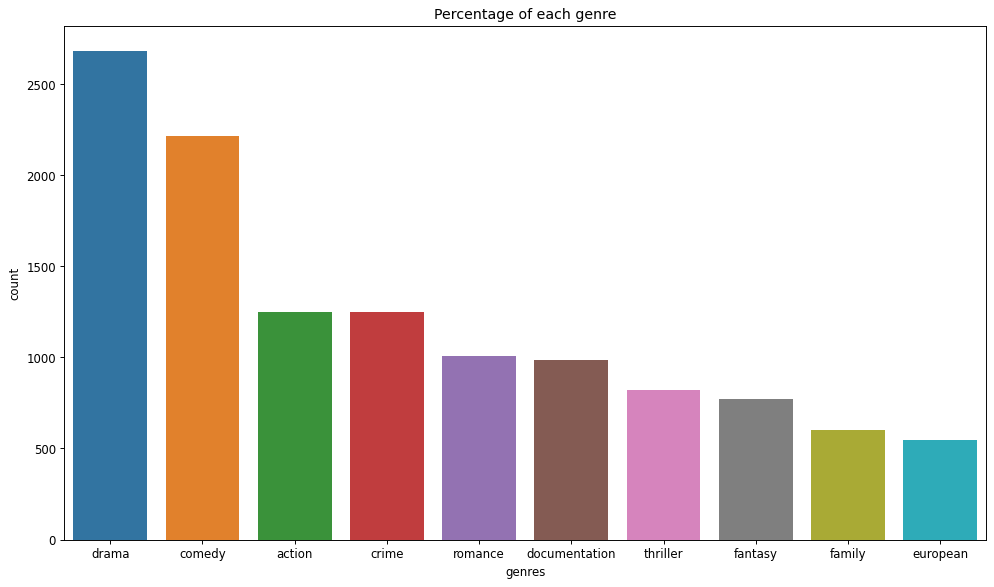

In [236]:
# Create new Dataframe to store name and count value
genres_df = defaultdict(int)
genres_values = df['genres'].value_counts().reset_index()
# Change columns name
genres_values.rename(columns={'index': 'genres', 'genres': 'count'}, inplace=True)
# Count value
for val in list_genres_values:
    for idx in range(genres_values.shape[0]):
        if val in df['genres'][idx]:
            genres_df[val] += int(genres_values['count'][idx])
genres_df = pd.DataFrame(pd.Series(genres_df)).reset_index()
genres_df.columns = ['genres', 'count']
# Sort value from high to low
genres_df.sort_values('count', ascending=False, inplace=True)

plt.figure(figsize=(14,8), dpi=85)
sns.barplot(x='genres', y='count', data=genres_df.nlargest(10, 'count'))
plt.title('Percentage of each genre');

Due to so many genres, we only need to care about the top 10 most popular genres. drama, comedy, action, and crime seem to have more movies than the others. But what happens when we combine two or more genres?

In [237]:
df['genres'].value_counts().reset_index().nlargest(10, 'genres')

,index,genres
0,['comedy'],510
1,['drama'],350
2,['documentation'],320
3,"['comedy', 'drama']",141
4,"['drama', 'comedy']",128
5,['reality'],120
6,"['drama', 'romance']",112
7,"['comedy', 'documentation']",93
8,['animation'],69
9,[],68


Even when combine genres, comedy and drama still make it to the top.

### Question 3: How many drama movie released every year? And does their quality increase overtime?
By calculating the IDMB of all drama movies every year, we can assume the quality of movies in these years, raising the question if we make more movies then what is the quality of these movies, will it increase or decrease?

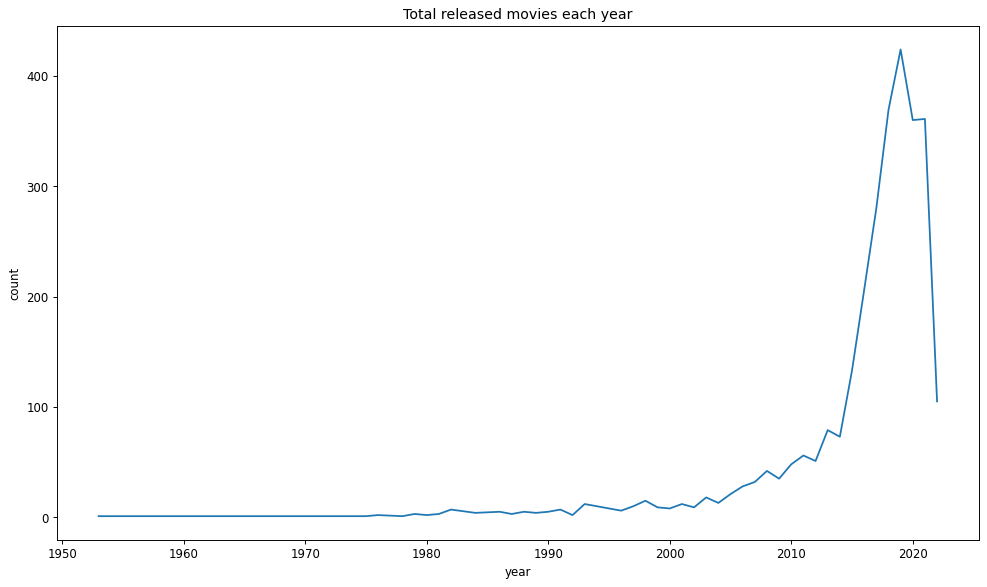

In [238]:
# Create Dataframe only contains drama genre
dfn = df[df['genres'].str.contains('drama')]
# Group by each year and count the movie/show id
data = dfn.groupby(by='release_year')['id'].count().reset_index()
# Rename the columns in DF
data = data.rename(columns={'release_year': 'year', 'id': 'count'})
plt.figure(figsize=(14,8), dpi=85)
sns.lineplot(x='year', y='count', data=data)
plt.title('Total released movies each year');

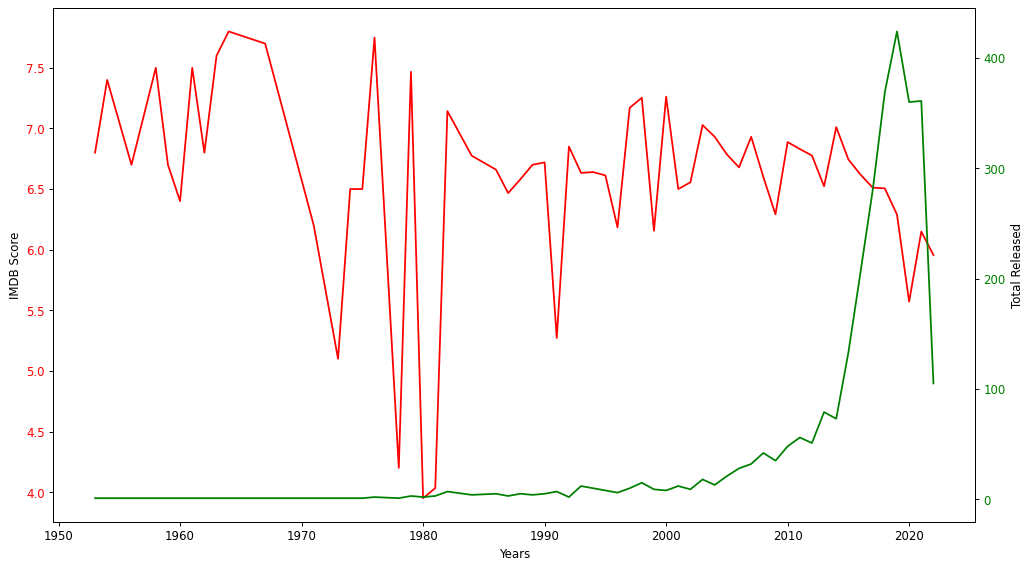

In [241]:
# plt.figure(figsize=(14,8), dpi=85)
fig, ax1 = plt.subplots(figsize=(14,8), dpi=85)
# Calculate Mean value of IMDB Score each year
ax1.plot(dfn.groupby(by='release_year')['imdb_score'].mean(), color='red', label='imdb_score')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_ylabel('IMDB Score')
ax1.set_xlabel('Years')
ax2 = ax1.twinx()
# Calculate total movies released each year
ax2.plot(dfn.groupby(by='release_year')['id'].count(), color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylabel('Total Released')
plt.show()

For quite a long time, the number of drama movies/shows increase with a small number every year but increasing until now but IMDB Score decreased every year, even the highest score still in the past and decreasing, the more movie, the less IMDB Score.

## IV. Summary
- Most producers seem to target teenagers and adults from TV-MA, R, and TV-14.
- Drama, comedy, action, and crime seem to have more movies than the others.
- Comedy and drama can be best combination.
- Quality of drama movies decrease every year even more movies released.
